### Average car prices - Bazil

The variables fuel, gear and engine_size were extracted from values of column model, as in original there is no column dedicated to those values. Since some values for model don't contain the information of engine size, this dataset doesn't contain the whole data from FIPE's original. Additionally, if 'Aut.' is not present in model, the car is assumed to be manual.

The prices are calculated by FIPE and they're here as original (in BRL).

FIPE updates the information on a monthly basis. Here, the referred month is given as mothofreference, as the corresponding year has variable named as yearofreference

The FIPE codes (fipe_codes) are the model identifier used in FIPE webpage. It can be found at: __[dataset](https://www.kaggle.com/datasets/vagnerbessa/average-car-prices-bazil)__

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
dataset = pd.read_csv('fipe_2022.csv')

In [6]:
dataset

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,age_years
0,2022,January,038001-6,vwmrywl5qs,Acura,NSX 3.0,Gasoline,manual,3.0,1995,43779.0,28
1,2022,January,038001-6,t9mt723qhz,Acura,NSX 3.0,Gasoline,manual,3.0,1994,42244.0,29
2,2022,January,038001-6,tr5wv4z21g,Acura,NSX 3.0,Gasoline,manual,3.0,1993,40841.0,30
3,2022,January,038001-6,s2xxsjz3mt,Acura,NSX 3.0,Gasoline,manual,3.0,1992,39028.0,31
4,2022,January,038001-6,rtm9gj7zk8,Acura,NSX 3.0,Gasoline,manual,3.0,1991,35678.0,32
...,...,...,...,...,...,...,...,...,...,...,...,...
290270,2022,December,061001-1,lzrp3rpklh8q,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,manual,1.6,2009,22894.0,14
290271,2022,December,061001-1,lrfw427w9v5h,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,manual,1.6,2008,22270.0,15
290272,2022,December,061001-1,lh98rfxnhy18,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,manual,1.6,2007,21663.0,16
290273,2022,December,061001-1,k9dtwsps5sy1,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,manual,1.6,2006,21073.0,17


In [7]:
len(dataset)

290275

In [9]:
dataset.describe()

,year_of_reference,engine_size,year_model,avg_price_brl,age_years
count,290275.0,290275.000000,290275.000000,2.902750e+05,290275.000000
mean,2022.0,2.266047,2008.896633,1.220872e+05,14.103367
std,0.0,1.033109,9.263619,3.219139e+05,9.263619
min,2022.0,0.700000,1985.000000,1.831000e+03,0.000000
25%,2022.0,1.600000,2001.000000,2.187500e+04,7.000000
50%,2022.0,2.000000,2010.000000,4.683600e+04,13.000000
75%,2022.0,2.800000,2016.000000,1.061650e+05,22.000000
max,2022.0,6.700000,2023.000000,8.600000e+06,38.000000


In [15]:
datasetwna = dataset.dropna()

In [16]:
len(datasetwna)

290275

### 1. What are the average prices per car year models?

In [45]:
year_model_sorted = np.sort(datasetwna.year_model.unique())

In [46]:
year_avg = []
for year_model in year_model_sorted:
    avg = datasetwna[datasetwna['year_model'] == year_model].avg_price_brl.mean()
    year_avg.append([year_model, avg])
year_avg = pd.DataFrame(year_avg, columns=['year_model', 'avg_price_brl'])

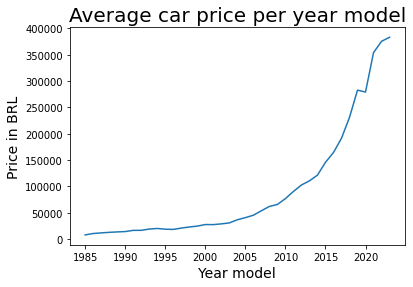

In [61]:
plt.plot(year_avg.year_model, year_avg.avg_price_brl)
plt.title('Average car price per year model', fontsize=20)
plt.xlabel('Year model', fontsize=14)
plt.ylabel('Price in BRL', fontsize=14)
plt.show()

R: As expected as the year passes by cars trend to depreciate. Even that we have some valuable old cars, in average the oldest the cheaper

### 2.There are difference in prices just looking to the fuel type?

In [62]:
fuel_sorted = np.sort(datasetwna.fuel.unique())

In [64]:
fuel_avg = []
for fuel in fuel_sorted:
    avg = datasetwna[datasetwna['fuel'] == fuel].avg_price_brl.mean()
    fuel_avg.append([fuel, avg])
fuel_avg = pd.DataFrame(fuel_avg, columns=['fuel', 'avg_price_brl'])

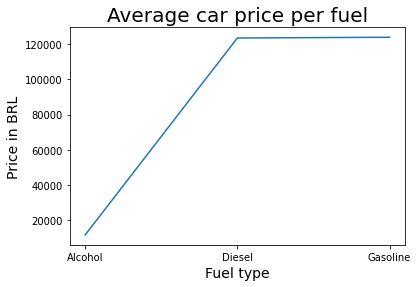

In [66]:
plt.plot(fuel_avg.fuel, fuel_avg.avg_price_brl)
plt.title('Average car price per fuel', fontsize=20)
plt.xlabel('Fuel type', fontsize=14)
plt.ylabel('Price in BRL', fontsize=14)
plt.show()

R: As we have only three possibilities, and there is no flex category, what is reasonable is that cars that only runs alcohol trend to be cheaper, because they need more fuel than those who runs gasoline in proportion. As the prices increases it the owner has to use more money to walk around. There is a simple rule that people who owns flex cars generally uses proportion = Alcohol price per liter/Gasoline price per liter; if it gets a proportion less than 0.7 it pays to use alcohol, otherwise gasoline is better.

### 3.There are difference in prices just looking to the gear type?

In [71]:
gear_sorted = np.sort(datasetwna.gear.unique())

In [72]:
gear_type_avg = []
for gear_type in gear_sorted:
    avg = datasetwna[datasetwna['gear'] == gear_type].avg_price_brl.mean()
    gear_type_avg.append([gear_type, avg])
gear_type_avg = pd.DataFrame(gear_type_avg, columns=['gear_type', 'avg_price_brl'])

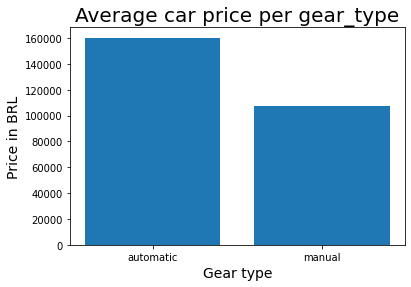

In [130]:
plt.bar(gear_type_avg.gear_type, gear_type_avg.avg_price_brl)
plt.title('Average car price per gear_type', fontsize=20)
plt.xlabel('Gear type', fontsize=14)
plt.ylabel('Price in BRL', fontsize=14)
plt.show()

R: As expected the cars with automatic geat trend to have higher prices comparing with manual ones. This is an ease provided by capitalism haha :)

### 4.There are difference in prices just looking to the engine size?

In [81]:
engine_size_sorted = np.sort(datasetwna.engine_size.unique())

In [82]:
engine_size_avg = []
for engine_size in engine_size_sorted:
    avg = datasetwna[datasetwna['engine_size'] == engine_size].avg_price_brl.mean()
    engine_size_avg.append([engine_size, avg])
engine_size_avg = pd.DataFrame(engine_size_avg, columns=['engine_size', 'avg_price_brl'])

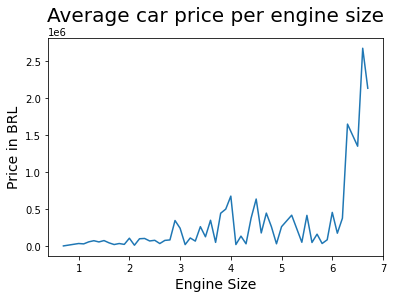

In [132]:
plt.plot(engine_size_avg.engine_size, engine_size_avg.avg_price_brl)
plt.title('Average car price per engine size', fontsize=20, y=1.05)
plt.xlabel('Engine Size', fontsize=14)
plt.ylabel('Price in BRL', fontsize=14)
plt.show()

R: Looking to the graph, we can see an noise in prices with sizes above 3.0 liters and trend to be considerable higher above 6 liter.

### 5.Which are the expensive models ?

In [94]:
model_sorted = np.sort(datasetwna.model.unique())

In [96]:
len(model_sorted)

6064

In [98]:
model_avg = []
for model in model_sorted :
    avg = datasetwna[datasetwna['model'] == model].avg_price_brl.mean()
    model_avg.append([model, avg])
model_avg = pd.DataFrame(model_avg, columns=['model', 'avg_price_brl'])

In [111]:
model_avg_sot = model_avg.sort_values(by='avg_price_brl', ascending=False)[:5]

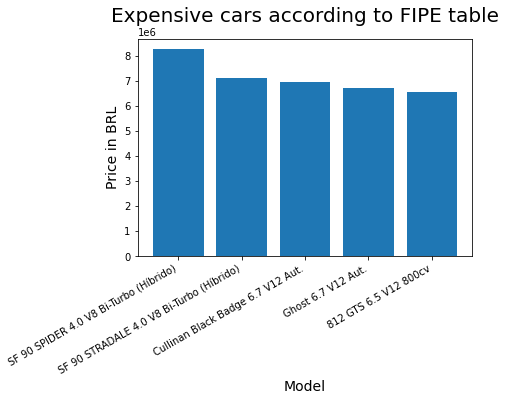

In [125]:
fig, ax = plt.subplots()
ax.bar(model_avg_sot.model,  model_avg_sot.avg_price_brl)
ax.set_title('Expensive cars according to FIPE table', fontsize=20, y=1.05)
ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Price in BRL', fontsize=14)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

In [127]:
model_avg_sot

,model,avg_price_brl
4807,SF 90 SPIDER 4.0 V8 Bi-Turbo (Híbrido),8.251858e+06
4808,SF 90 STRADALE 4.0 V8 Bi-Turbo (Híbrido),7.102503e+06
1716,Cullinan Black Badge 6.7 V12 Aut.,6.942570e+06
2609,Ghost 6.7 V12 Aut.,6.706959e+06
434,812 GTS 6.5 V12 800cv,6.533849e+06


R: The most expensive car registered costs R$8.251.858,00 in average.

### 6.Which are the cheapest models?

In [113]:
model_avg_desc = model_avg.sort_values(by='avg_price_brl', ascending=True)[:5]

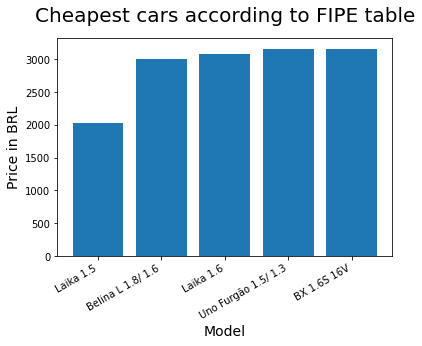

In [126]:
fig, ax = plt.subplots()
ax.bar(model_avg_desc.model,  model_avg_desc.avg_price_brl)
ax.set_title('Cheapest cars according to FIPE table', fontsize=20, y=1.05)
ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Price in BRL', fontsize=14)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

In [128]:
model_avg_desc

,model,avg_price_brl
3379,Laika 1.5,2020.625000
862,Belina L 1.8/ 1.6,3002.250000
3380,Laika 1.6,3075.766667
5541,Uno Furgão 1.5/ 1.3,3151.430556
855,BX 1.6S 16V,3159.583333


R: The cheapest car registered costs R$2020,00 in average.

### 7.Which months are more selling in 2022?

In [118]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [122]:
month_count = []
for month in months:
    ct = len(datasetwna[datasetwna['month_of_reference'] == month])
    month_count.append([month, ct])
month_count = pd.DataFrame(month_count, columns=['month', 'count_registered'])

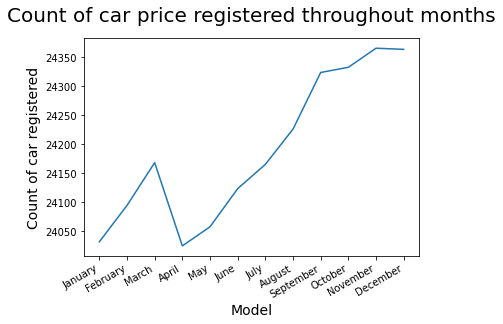

In [124]:
fig, ax = plt.subplots()
ax.plot(month_count.month, month_count.count_registered)
ax.set_title('Count of car price registered throughout months', fontsize=20, y=1.05)
ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Count of car registered', fontsize=14)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

R: With the inflation worldwide, cars seems to be evaluate but instead, money lost value. Some people are enjoying higher pices and are trying to sell their cars in a "good" price. 